In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


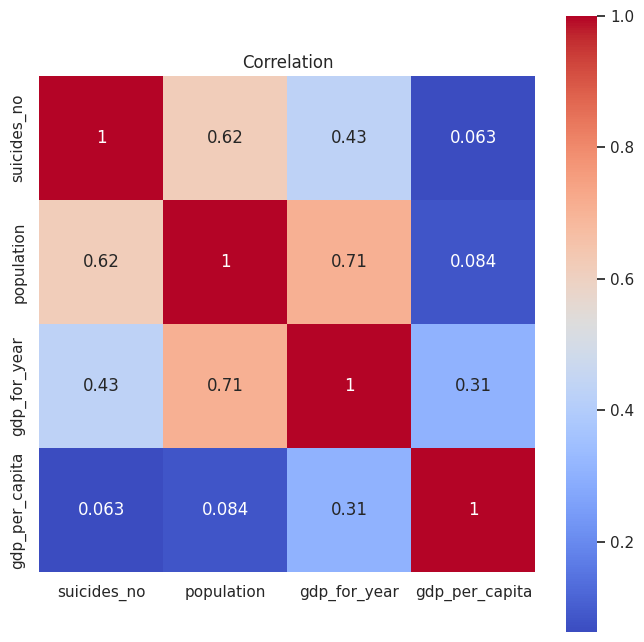

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/master1.csv')

# Create a subset of the dataset containing the desired columns
corr_df = df[['suicides_no', 'population', 'gdp_for_year', 'gdp_per_capita']]

# Compute the correlation matrix
corr_matrix = corr_df.corr()

# Create a heatmap correlation plot using seaborn
sns.set(style="white")
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True, ax=ax)
plt.title('Correlation')
plt.show()


<h2><b>Random Forest</b></h2>

In [40]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/master1.csv')

# Select features and target variable
X = data[['year', 'sex', 'age', 'country', 'gdp_per_capita']]
y = data['suicides_no']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# for x,y in zip(y_test,y_pred):
#   print(x,y)
# # Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3287.7658057283134


<h2><b>Predicting Suicide Numbers</b></h2>

<h3>Pre-Processing Data</h3>

In [42]:
df = pd.read_csv('/content/drive/MyDrive/master1.csv')
df.drop(['year'],inplace=True,axis=1)
X=df.drop(['suicides_no'],axis=1)
y=df.suicides_no
X.head()

,country,sex,age,population,gdp_for_year,gdp_per_capita,generation,continent
0,Albania,Male,15-24,312900.0,2.156625e+09,796,Generation X,Europe
1,Albania,Male,35-54,308000.0,2.156625e+09,796,Silent,Europe
2,Albania,Female,15-24,289700.0,2.156625e+09,796,Generation X,Europe
3,Albania,Male,75+,21800.0,2.156625e+09,796,G.I. Generation,Europe
4,Albania,Male,25-34,274300.0,2.156625e+09,796,Boomers,Europe


In [43]:
country_category={}
for i,x in enumerate(X.country.unique()):
  country_category[x]=i
age_category={}
for i,x in enumerate(X.age.unique()):
  age_category[x]=i
# print(country_category)
sex_category={'Male':1,'Female':0}
generation_category={}
for i,x in enumerate(X.generation.unique()):
  generation_category[x]=i
continent_category={}
for i,x in enumerate(X.continent.unique()):
  continent_category[x]=i
X.replace(country_category,inplace=True)
X.replace(age_category,inplace=True)
X.replace(sex_category,inplace=True)
X.replace(generation_category,inplace=True)
X.replace(continent_category,inplace=True)
# print(X.head())

  # print(x)

In [44]:
X['gdp_for_year'] = (X['gdp_for_year'] - X['gdp_for_year'].mean()) / X['gdp_for_year'].std()
X['population'] = (X['population'] - X['population'].mean()) / X['population'].std()
X['gdp_per_capita'] = (X['gdp_per_capita'] - X['gdp_per_capita'].mean()) / X['gdp_per_capita'].std()

In [45]:
for x in X.columns:
  print(x,": ",X[f'{x}'].unique())

country :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
sex :  [1 0]
age :  [0 1 2 3 4 5]
population :  [-0.39399058 -0.39523733 -0.39989357 ...  0.22919678  0.1959777
 -0.10748309]
gdp_for_year :  [-0.30621431 -0.30623526 -0.30609218 ... -0.27223518 -0.26821989
 -0.26454138]
gdp_per_capita :  [-0.84874094 -0.85017293 -0.84677858 ... -0.78679403 -0.7769292
 -0.76849636]
generation :  [0 1 2 3 4 5]
continent :  [0 1 2 3 4]


In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)
len(X_train)

21993

<h2><b>Metrics</b></h2>

In [47]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
def get_accuracy(y_test,y_pred):
  r2=r2_score(y_test, y_pred)
  mae=mean_absolute_error(y_test, y_pred)
  mse=mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  return [r2, mae, mse, rmse]

comparison=pd.DataFrame()

<h2><b>Linear Regression</b></h2>

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)
print(get_accuracy(y_test,y_pred_lr))
comparison["LinearRegression"]=get_accuracy(y_test,y_pred_lr)

[0.37224832185634815, 257.1858715496875, 457840.74765383685, 676.6393039528792]


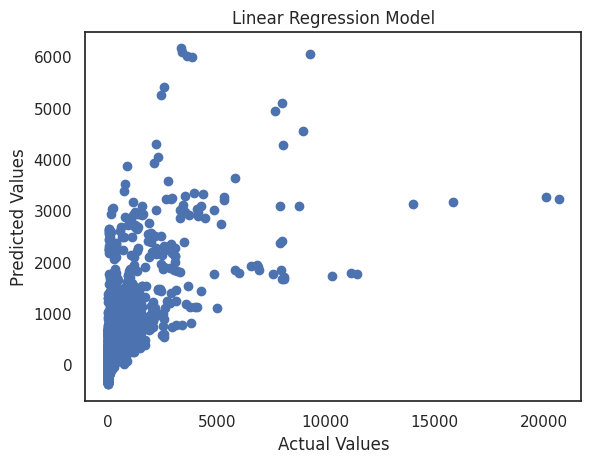

In [49]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()


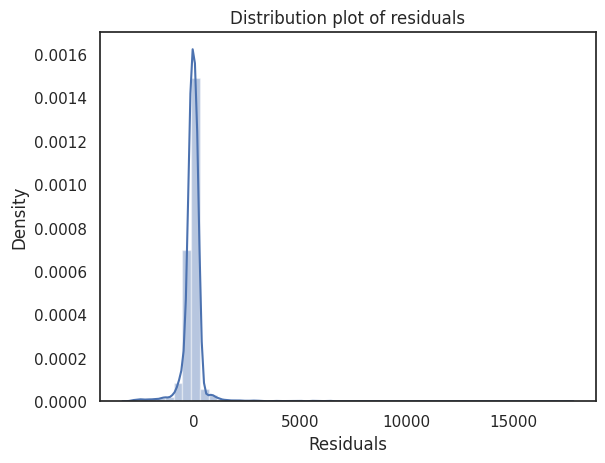

In [50]:
sns.distplot(y_test - y_pred_lr)
plt.xlabel('Residuals')
plt.title('Distribution plot of residuals')
plt.show()

<h2><b>Ridge Regression</b></h2>

In [51]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model object
ridge_model = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_ridge = ridge_model.predict(X_test)
print(get_accuracy(y_test,y_pred_ridge))
comparison["Ridge"]=get_accuracy(y_test,y_pred_ridge)


[0.3722488710791684, 257.1758415644167, 457840.3470868685, 676.6390079554004]


<h2><b>Lasso Regression</b></h2>

In [52]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model object
lasso_model = Lasso(alpha=0.1)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_lasso = lasso_model.predict(X_test)
print(get_accuracy(y_test,y_pred_lasso))
comparison["Lasso"]=get_accuracy(y_test,y_pred_lasso)


[0.3722405401083817, 257.02719060317355, 457846.42314851267, 676.6434978247502]


<h2><b>Elastic Net</b></h2>

In [53]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet Regression model object
elasticnet_model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the training data
elasticnet_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_en = elasticnet_model.predict(X_test)
print(get_accuracy(y_test,y_pred_en))
comparison["ElasticNet"]=get_accuracy(y_test,y_pred_en)


[0.3529170461336609, 213.19178947113298, 471939.7075421643, 686.9786805586941]


<h2><b>Decision Tree</b></h2>

In [54]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regression model object
dt_model = DecisionTreeRegressor(max_depth=5)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_dt = dt_model.predict(X_test)
print(get_accuracy(y_test,y_pred_dt))
comparison["DecisionTreeRegressor"]=get_accuracy(y_test,y_pred_dt)


[0.7072762096093086, 131.59321333995857, 213493.4620085085, 462.05352721141355]


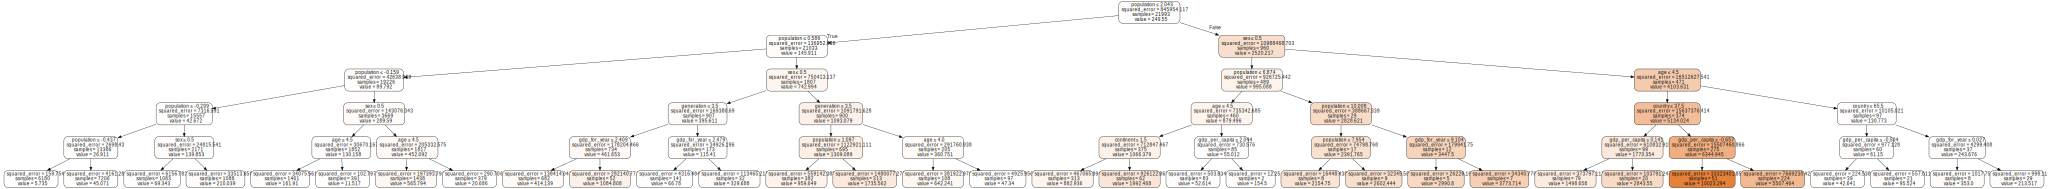

In [55]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree
dot_data = export_graphviz(dt_model, out_file=None, 
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


<h2><b>Gradient Boosting Regression</b></h2>

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model object
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_gb = gb_model.predict(X_test)
print(get_accuracy(y_test,y_pred_gb))
comparison["GradientBoostingRegressor"]=get_accuracy(y_test,y_pred_gb)


[0.9669285798202006, 59.933697951423085, 24120.116708996902, 155.30652500457572]


<h2><b>K Neighbours Regression</b></h2>

In [57]:
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regression model object
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_knn = knn_model.predict(X_test)
print(get_accuracy(y_test,y_pred_knn))
comparison["KNeighborsRegressor"]=get_accuracy(y_test,y_pred_knn)

[0.9220965878961747, 42.985561011092926, 56817.620221858524, 238.3644692941012]


<h2><b>Multi Layer Perceptron</b></h2>

In [58]:
from sklearn.neural_network import MLPRegressor

# Create an MLP Regression model object
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)

# Predict the output for the test data
y_pred_mlp = mlp_model.predict(X_test)
print(get_accuracy(y_test,y_pred_mlp))
comparison["MLPRegressor"]=get_accuracy(y_test,y_pred_mlp)

[0.8867028678374419, 121.70423555645209, 82631.46958003192, 287.4569003868787]


<h2><b>Random Forest</b></h2>

In [59]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions on the test set
predictions = rf_model.predict(X_test)
# print(rf_model.evaluate(X_test,y_test))
prediction_df=pd.DataFrame()
prediction_df['Actual Y']=y_test
prediction_df['Predicted Y']=predictions
print(get_accuracy(y_test,predictions))


[0.9872709015483068, 22.960816512093107, 9283.766423877069, 96.35230367706352]


In [60]:
comparison["RandomForestRegressor"]=get_accuracy(y_test,predictions)

In [61]:
prediction_df
prediction_df.columns=['Actual','Predicted']
prediction_df = prediction_df.to_csv("/content/drive/MyDrive/Prediction_RandomForest.csv")

In [62]:
comparison.T

,0,1,2,3
LinearRegression,0.372248,257.185872,457840.747654,676.639304
Ridge,0.372249,257.175842,457840.347087,676.639008
Lasso,0.372241,257.027191,457846.423149,676.643498
ElasticNet,0.352917,213.191789,471939.707542,686.978681
DecisionTreeRegressor,0.707276,131.593213,213493.462009,462.053527
GradientBoostingRegressor,0.966929,59.933698,24120.116709,155.306525
KNeighborsRegressor,0.922097,42.985561,56817.620222,238.364469
MLPRegressor,0.886703,121.704236,82631.469580,287.456900
RandomForestRegressor,0.987271,22.960817,9283.766424,96.352304


In [63]:
comparison["RandomForestRegressor"]=get_accuracy(y_test,predictions)
df=comparison.T
df.columns=['R2 Square','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df

,R2 Square,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
LinearRegression,0.372248,257.185872,457840.747654,676.639304
Ridge,0.372249,257.175842,457840.347087,676.639008
Lasso,0.372241,257.027191,457846.423149,676.643498
ElasticNet,0.352917,213.191789,471939.707542,686.978681
DecisionTreeRegressor,0.707276,131.593213,213493.462009,462.053527
GradientBoostingRegressor,0.966929,59.933698,24120.116709,155.306525
KNeighborsRegressor,0.922097,42.985561,56817.620222,238.364469
MLPRegressor,0.886703,121.704236,82631.469580,287.456900
RandomForestRegressor,0.987271,22.960817,9283.766424,96.352304


In [64]:
df=comparison.T
df.columns=['R2 Square','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df.to_csv("/content/drive/MyDrive/Accuracy_Comparison.csv")

In [65]:
df=pd.read_csv("/content/drive/MyDrive/Accuracy_Comparison.csv")
df.columns=['Models','R2 Square','Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
df

,Models,R2 Square,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.372248,257.185872,457840.747654,676.639304
1,Ridge,0.372249,257.175842,457840.347087,676.639008
2,Lasso,0.372241,257.027191,457846.423149,676.643498
3,ElasticNet,0.352917,213.191789,471939.707542,686.978681
4,DecisionTreeRegressor,0.707276,131.593213,213493.462009,462.053527
5,GradientBoostingRegressor,0.966929,59.933698,24120.116709,155.306525
6,KNeighborsRegressor,0.922097,42.985561,56817.620222,238.364469
7,MLPRegressor,0.886703,121.704236,82631.469580,287.456900
8,RandomForestRegressor,0.987271,22.960817,9283.766424,96.352304


<h2><b>Metrics Plot</b></h2>

In [66]:
import plotly.express as px

# Define the color codes for each metric
colors = {
    'R2 Square': 'blue',
    'Mean Absolute Error': 'green',
    'Mean Squared Error': 'red',
    'Root Mean Squared Error': 'orange'
}

# Create a bar plot for each metric
for metric in colors:
    fig = px.bar(df, x='Models', y=metric, color=metric, color_discrete_map={metric: colors[metric]})
    fig.show()

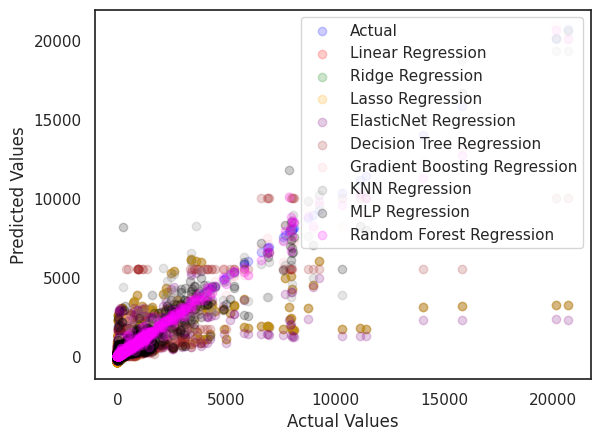

In [67]:
import matplotlib.pyplot as plt

# Plot the actual values as a scatter plot
plt.scatter(y_test, y_test, alpha=0.2, color='blue', label='Actual')

# Plot the predicted values from each model
plt.scatter(y_test, y_pred_lr, alpha=0.2, color='red', label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.2, color='green', label='Ridge Regression')
plt.scatter(y_test, y_pred_lasso, alpha=0.2, color='orange', label='Lasso Regression')
plt.scatter(y_test, y_pred_en, alpha=0.2, color='purple', label='ElasticNet Regression')
plt.scatter(y_test, y_pred_dt, alpha=0.2, color='brown', label='Decision Tree Regression')
plt.scatter(y_test, y_pred_gb, alpha=0.2, color='pink', label='Gradient Boosting Regression')
plt.scatter(y_test, y_pred_knn, alpha=0.2, color='gray', label='KNN Regression')
plt.scatter(y_test, y_pred_mlp, alpha=0.2, color='black', label='MLP Regression')
plt.scatter(y_test, predictions, alpha=0.2, color='magenta', label='Random Forest Regression')

# Add axis labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [68]:
import plotly.subplots as sp
import plotly.graph_objs as go

# Create subplots with 3 rows and 3 columns
fig = sp.make_subplots(rows=3, cols=3)

# Define the list of models
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'DecisionTreeRegressor',
          'GradientBoostingRegressor', 'KNeighborsRegressor', 'MLPRegressor', 'RandomForestRegressor']

# Loop through each model and add a scatter plot to each subplot
for i, model in enumerate(models):
    row = (i // 3) + 1
    col = (i % 3) + 1
    
    # Predict the target values for the current model
    y_pred = globals()[model]().fit(X_train, y_train).predict(X_test)
    
    # Add a scatter plot of actual vs predicted values
    fig.add_trace(go.Scatter(x=y_pred, y=y_test, mode='markers',name=model), row=row, col=col)

# Set the layout of the figure
fig.update_layout(title='Scatter Plot of Actual vs Predicted Values for Different Models',height=900, width=900)

# Show the figure
fig.show()
